In [1]:
import pandas as pd
import numpy as np
import model_creation as mc
import evaluation_model as em
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Import all pre-processed data 

# Dataset WITHOUT Personal Information
X_train = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_train_xFeat.csv')
y_train = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_train_y.csv')
X_test = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_test_xFeat.csv')
y_test = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_test_y.csv')

# Dataset WITH Personal Information
X_train_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_train_xFeat.csv')
y_train_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_train_y.csv')
X_test_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_test_xFeat.csv')
y_test_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_test_y.csv')

# Building Datasets

#### Dataset 1 - including latitude and longitude

In [3]:
# Creating dataset with latitude and longitude
X_train_lat_long = X_train.copy()
y_train_lat_long = y_train_pi.copy()
X_test_lat_long = X_test.copy()
y_test_lat_long = y_test_pi.copy()

X_train_lat_long['lat'] = X_train_pi['lat']
X_train_lat_long['long'] = X_train_pi['long']
X_test_lat_long['lat'] = X_test_pi['lat']
X_test_lat_long['long'] = X_test_pi['long']

#### Dataset 2 - including year born

In [4]:
# Creating dataset with year born
X_train_year_born = X_train.copy()
y_train_year_born = y_train_pi.copy()
X_test_year_born = X_test.copy()
y_test_year_born = y_test_pi.copy()

X_train_year_born['year_born'] = X_train_pi['year_born']
X_test_year_born['year_born'] = X_test_pi['year_born']

#### Dataset 3 - including gender

In [5]:
# Creating dataset with gender
X_train_gender = X_train.copy()
y_train_gender = y_train_pi.copy()
X_test_gender = X_test.copy()
y_test_gender = y_test_pi.copy()

X_train_gender['gender'] = X_train_pi['gender']
X_test_gender['gender'] = X_test_pi['gender']


# Building Decision Trees

In [6]:
# Finding the optimal parameters for the decision tree classifier using the total dataset WITH personal information.
optimal_params, results = mc.Decision_Tree(X_train_pi, y_train_pi.values.ravel())

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


In [7]:
# Building Base Decision Tree on complete dataset (i.e. with personal information)
DT_base, time_elapsed_DT_base = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_pi, y_train_pi.values.ravel())

In [8]:
# Building Decision Tree fitted on NO PI dataset
DT_no_pi, time_elapsed_DT_no_pi = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train, y_train.values.ravel())

In [9]:
# Building Decision Tree on Dataset 1 - NO PI but w/ lat and long
DT_lat_long, time_elapsed_lat_long = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_lat_long, y_train_lat_long.values.ravel())

In [10]:
# Building Decision Tree on Dataset 2 - NO PI but w/ year_born
DT_year_born, time_elapsed_year_born = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_year_born, y_train_year_born.values.ravel())

In [11]:
# Building Decision Tree on Dataset 3 - NO PI but w/ gender
DT_gender, time_elapsed_gender = mc.Modelling(DecisionTreeClassifier(**optimal_params), X_train_gender, y_train_gender.values.ravel())

# Predictions for Decision Trees

In [12]:
# Predictions for Base Decision Tree
DT_base_predict = DT_base.predict(X_test_pi)

In [13]:
# Predictions for Decision Tree fitted on NO PI dataset
DT_no_pi_predict = DT_no_pi.predict(X_test)

In [14]:
# Predictions for Decision Tree fitted on Dataset 1
DT_lat_long_predict = DT_lat_long.predict(X_test_lat_long)

In [15]:
# Predictions for Decision Tree fitted on Dataset 2
DT_year_born_predict = DT_year_born.predict(X_test_year_born)

In [16]:
# Predictions for Decision Tree fitted on Dataset 3
DT_gender_predict = DT_gender.predict(X_test_gender)

# Accuracy for Decision Trees

In [17]:
# Accuracy for Base Decision Tree
acc_base = em.eval_model(DT_base, X_test_pi, y_test_pi.values.ravel(), DT_base_predict, time_elapsed_DT_base)
acc_base

({'AUC': 0.8776764163441241,
  'AUPRC': 0.38358884423379686,
  'F1': 0.6060037523452156,
  'Accuracy': 0.9962211185489095,
  'Time': 3.170146958000032},
 {'fpr': array([0.        , 0.00286313, 1.        ]),
  'tpr': array([0.        , 0.75821596, 1.        ])})

In [18]:
# Accuracy for NO PI Decision Tree
acc_no_pi = em.eval_model(DT_no_pi, X_test, y_test.values.ravel(), DT_no_pi_predict, time_elapsed_DT_no_pi)
acc_no_pi

({'AUC': 0.8477330683281394,
  'AUPRC': 0.279841624211462,
  'F1': 0.5076660988074957,
  'Accuracy': 0.9947995393363565,
  'Time': 1.8415444160000334},
 {'fpr': array([0.        , 0.00406438, 1.        ]),
  'tpr': array([0.        , 0.69953052, 1.        ])})

In [19]:
# Accuracy for decision tree based on Dataset 1
acc_lat_long = em.eval_model(DT_lat_long, X_test_lat_long, y_test_lat_long.values.ravel(), DT_lat_long_predict, time_elapsed_lat_long)
acc_lat_long

({'AUC': 0.8670132393195861,
  'AUPRC': 0.2558373643520666,
  'F1': 0.4701492537313433,
  'Accuracy': 0.9936118908802994,
  'Time': 2.503872250000086},
 {'fpr': array([0.        , 0.00541014, 1.        ]),
  'tpr': array([0.        , 0.73943662, 1.        ])})

In [20]:
# Accuracy for decision tree based on Dataset 2
acc_year_born = em.eval_model(DT_year_born, X_test_year_born, y_test_year_born.values.ravel(), DT_year_born_predict, time_elapsed_year_born)
acc_year_born

({'AUC': 0.8972722605253443,
  'AUPRC': 0.27454621183835404,
  'F1': 0.47926914968376666,
  'Accuracy': 0.9933329734398618,
  'Time': 1.7326735829999507},
 {'fpr': array([0.        , 0.00592496, 1.        ]),
  'tpr': array([0.        , 0.80046948, 1.        ])})

In [21]:
# Accuracy for decision tree based on Dataset 3
acc_gender = em.eval_model(DT_gender, X_test_gender, y_test_gender.values.ravel(), DT_gender_predict, time_elapsed_gender)
acc_gender

({'AUC': 0.8679385694757065,
  'AUPRC': 0.2426430636122241,
  'F1': 0.4527220630372493,
  'Accuracy': 0.9931260346937306,
  'Time': 1.9514849580000373},
 {'fpr': array([0.       , 0.0059069, 1.       ]),
  'tpr': array([0.        , 0.74178404, 1.        ])})

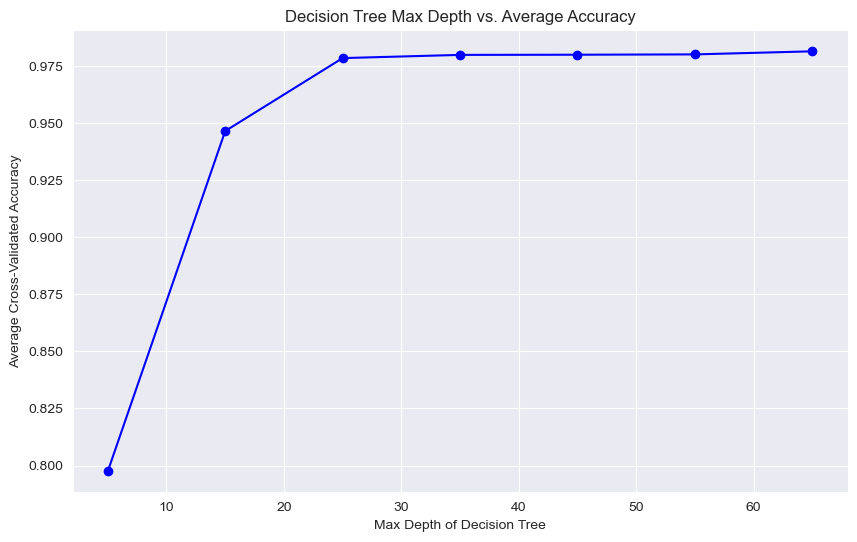

In [22]:
cv_results_df = pd.DataFrame(results)

# Extract and average the test scores for each max_depth
mean_test_scores = cv_results_df.groupby('param_max_depth')['mean_test_score'].mean().reset_index()

# Plotting the mean accuracy as a function of max_depth
plt.figure(figsize=(10, 6))
plt.plot(mean_test_scores['param_max_depth'], mean_test_scores['mean_test_score'], marker='o', linestyle='-', color='blue')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Average Cross-Validated Accuracy')
plt.title('Decision Tree Max Depth vs. Average Accuracy')
plt.grid(True)
plt.show()

In [23]:
optimal_params

{'max_depth': 55,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}